In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
import numpy as np
import h5py


/Users/gailin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [77]:
nbdat = pd.read_csv("../data/remote/latlong_nobin/output/results-upper-meanvprhorange-earthchem-Crust1.0.csv")
bdat = pd.read_csv("../data/remote/latlong_weighted/output/results-upper-meanvprhorange-earthchem-Crust1.0.csv")

middle_nbdat = pd.read_csv("../data/remote/latlong_nobin/output/results-middle-meanvprhorange-earthchem-Crust1.0.csv")

lower_nbdat = pd.read_csv("../data/remote/latlong_nobin/output/results-lower-meanvprhorange-earthchem-Crust1.0.csv")

In [3]:
nb_means, nb_edges, nbnum = stats.binned_statistic(nbdat["sample_geotherm"], nbdat["SiO2"], statistic=np.nanmean)
b_means, b_edges, bnum = stats.binned_statistic(bdat["sample_geotherm"], bdat["SiO2"], statistic=np.nanmean)


(50, 80)

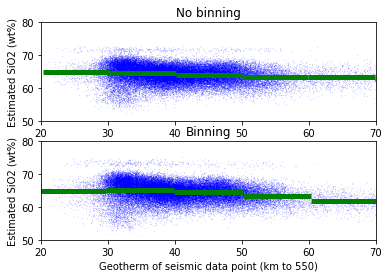

In [4]:
fig, axs = plt.subplots(2)

axs[0].plot(nbdat["sample_geotherm"], nbdat["SiO2"], 'b.', zorder=1, ms=.2, alpha=.5)
axs[0].hlines(nb_means, nb_edges[:-1], nb_edges[1:], colors='g', lw=5, 
              zorder=2)
axs[0].set_title("No binning")
axs[0].set_ylabel("Estimated SiO2 (wt%)")
axs[0].set_xlim(left=20, right=70)
axs[0].set_ylim(bottom=50, top=80)

axs[1].plot(bdat["sample_geotherm"], bdat["SiO2"], 'b.', zorder=1, ms=.2, alpha=.5)
axs[1].hlines(b_means, b_edges[:-1], b_edges[1:], colors='g', lw=5, zorder=2)
axs[1].set_title("Binning")
axs[1].set_ylabel("Estimated SiO2 (wt%)")
axs[1].set_xlabel("Geotherm of seismic data point (km to 550)")
axs[1].set_xlim(left=20, right=70)
axs[1].set_ylim(bottom=50, top=80)



In [5]:
binned_comp = []
for i in range(1,11): 
    binned_comp.append(pd.read_csv(f"../data/remote/latlong_weighted/bsr_ignmajors_{i}.csv",
        names=["SiO2","TiO2","Al2O3","FeO","MgO","CaO","Na2O","K2O","H2O_Total","CO2", "Latitude", "Longitude", "Age", "geotherm", "upper", "middle", "lower"]))

In [6]:
## Load Perple_X seismic layer for each composition file 
for i in range(1,11):
    # Dat is n:3:4, sample, layer, property (index, rho, vp, vpvs)
    dat = h5py.File(f"../data/remote/latlong_weighted/perplex_out_{i}.h5", 'r')["results"]
    binned_comp[i-1]["upper rho"] = dat[:,0,1]
    binned_comp[i-1]["upper vp"] = dat[:,0,2]
    binned_comp[i-1]["upper vpvs"] = dat[:,0,3]
    binned_comp[i-1]["middle rho"] = dat[:,1,1]
    binned_comp[i-1]["middle vp"] = dat[:,1,2]
    binned_comp[i-1]["middle vpvs"] = dat[:,1,3]
    binned_comp[i-1]["lower rho"] = dat[:,2,1]
    binned_comp[i-1]["lower vp"] = dat[:,2,2]
    binned_comp[i-1]["lower vpvs"] = dat[:,2,3]
    

In [81]:
unbinned_comp = pd.read_csv("../data/remote/latlong_nobin/bsr_ignmajors_1.csv",
                            names=["SiO2","TiO2","Al2O3","FeO","MgO","CaO","Na2O","K2O","H2O_Total","CO2", "Latitude", "Longitude", "Age", "geotherm", "upper", "middle", "lower"])

seismic_dat = h5py.File(f"../data/remote/latlong_nobin/perplex_out_1.h5", 'r')["results"]
unbinned_comp["upper rho"] = seismic_dat[:,0,1]
unbinned_comp["upper vp"] = seismic_dat[:,0,2]
unbinned_comp["upper vpvs"] = seismic_dat[:,0,3]
unbinned_comp["middle rho"] = seismic_dat[:,1,1]
unbinned_comp["middle vp"] = seismic_dat[:,1,2]
unbinned_comp["middle vpvs"] = seismic_dat[:,1,3]
unbinned_comp["lower rho"] = seismic_dat[:,2,1]
unbinned_comp["lower vp"] = seismic_dat[:,2,2]
unbinned_comp["lower vpvs"] = seismic_dat[:,2,3]

# unbinned_comp = pd.read_csv("../data/test_nobin/bsr_ignmajors_1.csv",
#                             names=["SiO2","TiO2","Al2O3","FeO","MgO","CaO","Na2O","K2O","H2O_Total","CO2", "Latitude", "Longitude", "Age", "geotherm", "upper", "middle", "lower"])

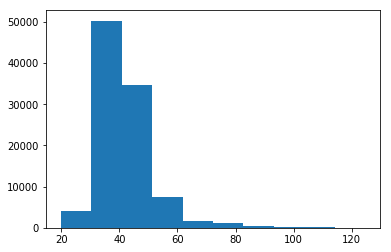

In [8]:
plt.hist(unbinned_comp["geotherm"])
plt.show()

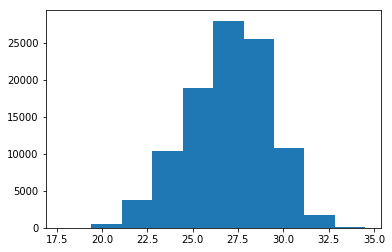

In [9]:
plt.hist(binned_comp[0]["geotherm"])
plt.show()

In [118]:
over_geotherm = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
for i in range(10):
    over_geotherm[0][i] = binned_comp[i]["upper vpvs"]
    over_geotherm[1][i] = binned_comp[i]["middle vpvs"]
    over_geotherm[2][i] = binned_comp[i]["lower vpvs"]

Text(0.5,0.98,'Perple_X Vp estimates over geotherms \n')

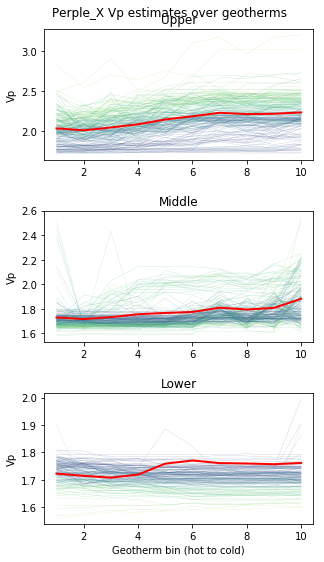

In [119]:
fig, axs = plt.subplots(3, figsize=(5,8))
colors = plt.get_cmap("viridis").colors

fig.tight_layout(pad=3.0)

for l in range(3):
    
    for i in range(200):
        j = np.random.randint(len(over_geotherm[l]))
        if not np.isnan(sum(over_geotherm[l].iloc[j,:])):
            color = int(len(colors)/(85-35) * (binned_comp[0].iloc[j,0]-35))
            axs[l].plot(range(1,11), over_geotherm[l].iloc[j,:], 
                        color=colors[color], linewidth=.1)

    axs[l].plot(range(1,11), [np.nanmean(over_geotherm[l].iloc[:,i]) for i in range(10)]
                , color='r', linewidth=2, label="mean")
    axs[l].set_ylabel("Vp")
    
axs[0].set_title("Upper")
axs[1].set_title("Middle")
axs[2].set_title("Lower")
axs[2].set_xlabel("Geotherm bin (hot to cold)")
fig.suptitle("Perple_X Vp estimates over geotherms \n")

#plt.show()

In [117]:
print(b_means)

[64.9336532  65.10484965 64.36533468 63.40526183 61.83855552 60.41344614
 60.34097552 61.01215801 60.95063092 61.24952885]


In [29]:
fig.savefig("../output/perplex_over_geotherm_bins.png")

## Split by mafic vs felsic

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0cb5c710>]],
      dtype=object)

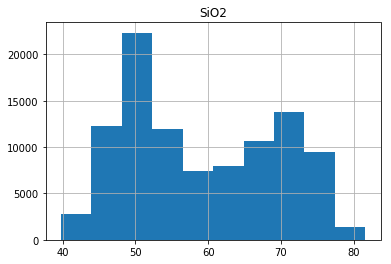

In [35]:
binned_comp[0].hist("SiO2")

In [58]:
cutoff = 60 # % sio2 cutoff between mafic and felsic samples 

In [64]:
felsic = binned_comp[0]["SiO2"] >= cutoff
mafic = binned_comp[0]["SiO2"] <= cutoff

In [65]:
print(binned_comp[0]["SiO2"].head())

print(mafic.head())

print(felsic.head())

1.0    61.15574
2.0    68.25058
3.0    72.79734
4.0    56.06021
5.0    57.59974
Name: SiO2, dtype: float64
1.0    False
2.0    False
3.0    False
4.0     True
5.0     True
Name: SiO2, dtype: bool
1.0     True
2.0     True
3.0     True
4.0    False
5.0    False
Name: SiO2, dtype: bool


Text(0.5,0.98,'Perple_X Vp estimates over geotherms \n')

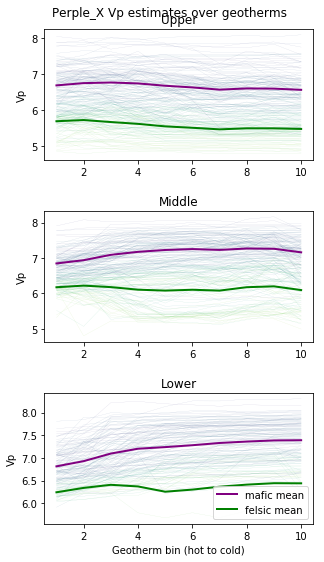

In [113]:
fig, axs = plt.subplots(3, figsize=(5,8))

fig.tight_layout(pad=3.0)

for l in range(3):
    
    for i in range(200):
        j = np.random.randint(len(over_geotherm[l]))
        if not np.isnan(sum(over_geotherm[l].iloc[j,:])):
            color = int(len(colors)/(85-35) * (binned_comp[0].iloc[j,0]-35))
            axs[l].plot(range(1,11), over_geotherm[l].iloc[j,:], 
                        color=colors[color], linewidth=.1, alpha=.5, label='_nolegend_')
            

    axs[l].plot(range(1,11), [np.nanmean(over_geotherm[l].loc[mafic,i]) for i in range(10)],
                color='purple', linewidth=2, label="mafic mean")
    
    axs[l].plot(range(1,11), [np.nanmean(over_geotherm[l].loc[felsic,i]) for i in range(10)],
                color='green', linewidth=2, label="felsic mean")
    
    axs[l].set_ylabel("Vp")
    
axs[2].legend()
    
axs[0].set_title("Upper")
axs[1].set_title("Middle")
axs[2].set_title("Lower")
axs[2].set_xlabel("Geotherm bin (hot to cold)")
fig.suptitle("Perple_X Vp estimates over geotherms \n")

In [114]:
fig.savefig("../output/perplex_over_geotherm_bins.pdf")

## Comparison of prior and result distributions in upper, middle, and lower

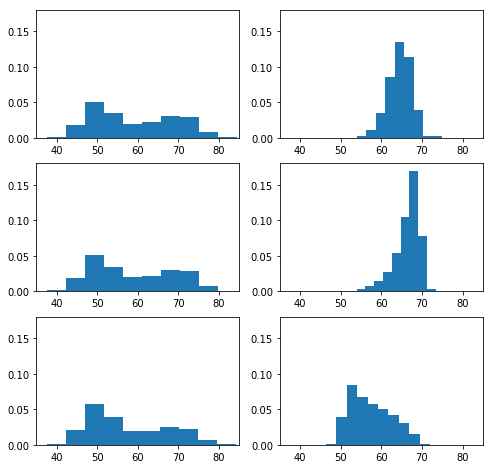

In [107]:
ok_upper = pd.notna(unbinned_comp["upper vp"])
ok_middle = pd.notna(unbinned_comp["middle vp"])
ok_lower = pd.notna(unbinned_comp["lower vp"])

fig, axs = plt.subplots(3, 2, figsize=(8,8))

axs[0,0].hist(unbinned_comp.loc[ok_upper,"SiO2"], density=True)
axs[0,1].hist(bdat["SiO2"], density=True)

axs[1,0].hist(unbinned_comp.loc[ok_middle,"SiO2"], density=True)
axs[1,1].hist(middle_bdat["SiO2"], density=True)

axs[2,0].hist(unbinned_comp.loc[ok_lower,"SiO2"], density=True)
axs[2,1].hist(lower_bdat["SiO2"], density=True)

for i in range(2): 
    for j in range(3):
        axs[j,i].set_xlim(left=35, right=85)
        axs[j,i].set_ylim(bottom=0, top=.18)


In [109]:
fig.savefig("../output/model_changes_comp_hist.pdf")